# Simulación Montecarlo

## 1. Motivación

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime, timedelta
import scipy.stats as stats
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
def get_historical_closes(ticker, start_date, end_date=None):
    #closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')
    closes = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date).read()
    closes.set_axis(closes.loc['date',:,ticker[0]].values, axis=1, inplace=True)
    closes = closes.loc['adjclose'].sort_index().dropna()
    closes = pd.DataFrame(np.array(closes.as_matrix(), dtype=np.float64), columns=ticker, index=closes.index)
    closes.index.name = 'Date'
    #return closes.loc['Adj Close']
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

In [28]:
closes_aapl = get_historical_closes(['AAPL'], '2016-01-01')

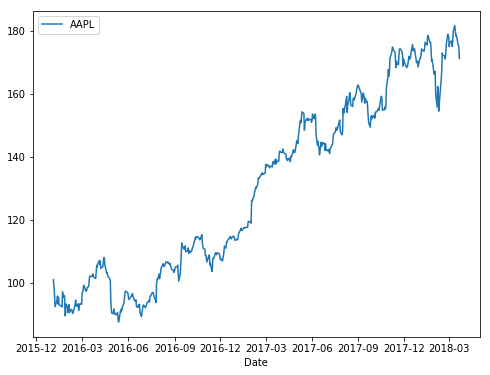

In [29]:
closes_aapl.plot(figsize=(8,6));

In [30]:
ret_aapl = calc_daily_ret(closes_aapl)

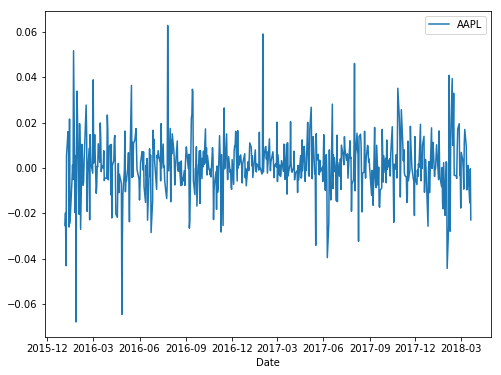

In [31]:
ret_aapl.plot(figsize=(8,6));

## 2. Modelo normal para los rendimientos

In [32]:
mu = ret_aapl.mean().AAPL
sigma = ret_aapl.std().AAPL
ndays = (datetime(2018,6,15).date()-datetime(2018,3,21).date()).days
nscen = 10000
K = 180

In [33]:
dates = pd.date_range('2018-03-22',periods=ndays).astype('str')
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+mu,index=dates)
sim_closes = (closes_aapl.iloc[-1].AAPL)*np.exp(sim_ret.cumsum())

In [34]:
ST = sim_closes.tail(1)
ind = np.digitize(ST.values[0],np.array([0, K, ST.values.max()+1]))
freq = (np.array([sum(ind==1),sum(ind==2)])/nscen)*100

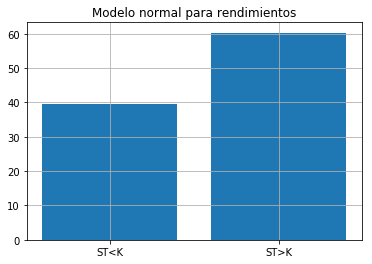

In [35]:
bar_labels = ['ST<K', 'ST>K']
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos,freq);
plt.title('Modelo normal para rendimientos')
plt.grid();
plt.xticks(x_pos, bar_labels);

## 3. Uso del histograma de los rendimientos

In [36]:
freq, values = np.histogram(ret_aapl, bins=700)
freq = freq.astype('float32')
prob = freq/np.sum(freq)
ndays = (datetime(2018,6,15).date()-datetime(2018,3,21).date()).days
nscen = 10000
K = 180

In [37]:
dates = pd.date_range('2018-03-22',periods=ndays).astype('str')
sim_ret_hist = pd.DataFrame(np.random.choice(values[1:], (ndays,nscen), p = prob), index=dates)
sim_closes_hist = (closes_aapl.iloc[-1].AAPL)*np.exp(sim_ret_hist.cumsum())

In [38]:
ST_hist = sim_closes_hist.tail(1)
ind = np.digitize(ST_hist.values[0],np.array([0, K, ST_hist.values.max()+1]))
freq = (np.array([sum(ind==1),sum(ind==2)])/nscen)*100

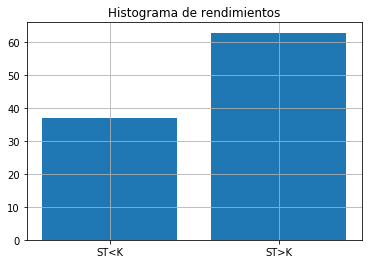

In [39]:
bar_labels = ['ST<K', 'ST>K']
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos,freq);
plt.title('Histograma de rendimientos')
plt.grid();
plt.xticks(x_pos, bar_labels);

## 4. Uso de distribución empírica aproximada con kernel

In [40]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(ret_aapl)
ndays = (datetime(2018,6,15).date()-datetime(2018,3,21).date()).days
nscen = 10000
K = 180

In [41]:
dates = pd.date_range('2018-03-22',periods=ndays).astype('str')
ret = kde.sample(n_samples=ndays*nscen, random_state=None)
sim_ret_kernel = pd.DataFrame(ret.reshape((ndays, nscen)),index= dates)
sim_closes_kernel = (closes_aapl.iloc[-1].AAPL)*np.exp(sim_ret_kernel.cumsum())

In [42]:
ST_kernel = sim_closes_kernel.tail(1)
ind = np.digitize(ST_kernel.values[0],np.array([0, K, ST_kernel.values.max()+1]))
freq = (np.array([sum(ind==1),sum(ind==2)])/nscen)*100

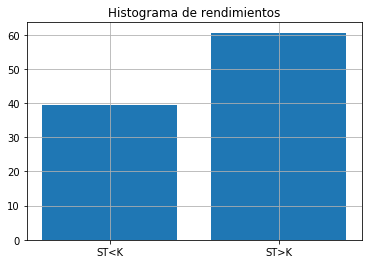

In [43]:
bar_labels = ['ST<K', 'ST>K']
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos,freq);
plt.title('Histograma de rendimientos')
plt.grid();
plt.xticks(x_pos, bar_labels);

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>